In [1]:
import pyvista as pv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

In [87]:
####refinement
folder = '/mnt/backup/Dropbox/data/publishings/progress_results/validations/simple_numerical_tests/sods_tests/test1/'
folder_latex = '/mnt/backup/Dropbox/Apps/Overleaf/Progress and results/pics/numerics/'

In [63]:
#wrapper fucntion to shape and get field varibles
def get_field(mesh,field):

    mesh_dim = mesh.dimensions
    var = mesh.point_arrays[field].reshape(mesh_dim[1],mesh_dim[0],order='C')

    return var

### Test 1

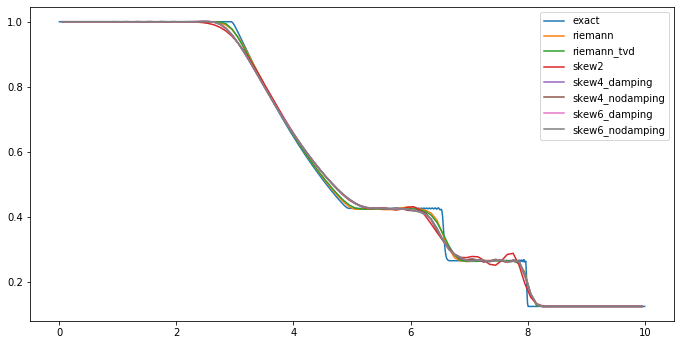

In [88]:
#with and without damping --> no real difference
numerical_scheme = ['exact','riemann','riemann_tvd','skew2','skew4_damping','skew4_nodamping','skew6_damping','skew6_nodamping']

nplots = len(numerical_scheme)
initial_timestep = 1700
scale = 2 #scale w.r.t A4
l = 5.77
aspect = 0.5
size = scale*np.array([l,l*aspect])
fig = plt.figure(figsize=size)
ax=fig.add_subplot(1,1,1)
for i in range(0,nplots):
    if(i>=1):
        initial_timestep = 170
    grid = pv.read(folder + numerical_scheme[i] + '/plt/XML_MPI_' + "%08d"%initial_timestep + '.pvtr')
    var_field = get_field(grid,'nvrh')[0]
    ax.plot(grid.x,var_field,label=numerical_scheme[i])
ax.legend()

plt.savefig(folder_latex + 'sods_test1',dpi=600,bbox_inches='tight')

In [ ]:
# - Make two pictures 
- skew schemes - 2,4,6  with damping without damping
- Best one from there can compare w

### Test 3

In [92]:
folder = '/mnt/backup/Dropbox/data/publishings/progress_results/validations/simple_numerical_tests/sods_tests/test3/'
numerical_scheme = ['exact','riemann','riemann_tvd','skew2']

In [93]:
# ####refinement
# folder = '/mnt/main/code/beta_compreal/wrk/'
# scale = 1 #scale w.r.t A4
# l = 5.77
# aspect = 0.5
# size = scale*np.array([l,l*aspect])
# fig = plt.figure(figsize=size)


# ax=fig.add_subplot(1,1,1)
# grid = pv.read(folder + '/plt/XML_MPI_' + "%08d"%12000 + '.pvtr')
# var_field = get_field(grid,'nvrh')[0]
# ax.plot(grid.x,var_field)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

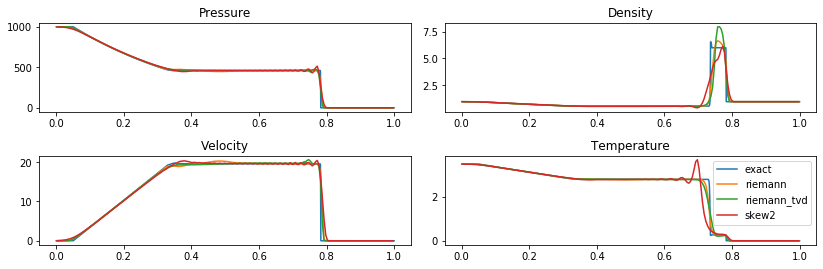

In [94]:
nplots = len(numerical_scheme)
initial_timestep = 12000
scale = 2 #scale w.r.t A4
l = 5.77
aspect = 0.333
size = scale*np.array([l,l*aspect])
fig = plt.figure(figsize=size)

for i in range(0,nplots):
    if(i>=1):
        initial_timestep = 600
    grid = pv.read(folder + numerical_scheme[i] + '/plt/XML_MPI_' + "%08d"%initial_timestep + '.pvtr')
    ax=fig.add_subplot(2,2,1)
    var_field = get_field(grid,'nvpr')[0]
    ax.plot(grid.x,var_field,label=numerical_scheme[i])
    ax.set_title('Pressure')
    
    ax=fig.add_subplot(2,2,2)
    var_field = get_field(grid,'nvrh')[0]
    ax.plot(grid.x,var_field,label=numerical_scheme[i])
    ax.set_title('Density')
        
    ax=fig.add_subplot(2,2,3)
    var_field = get_field(grid,'nvux')[0]
    ax.plot(grid.x,var_field,label=numerical_scheme[i])
    ax.set_title('Velocity')
    
    ax=fig.add_subplot(2,2,4)
    var_field = get_field(grid,'nvtp')[0]
    ax.plot(grid.x,var_field,label=numerical_scheme[i])
    ax.set_title('Temperature')
ax.legend()
plt.tight_layout()

plt.savefig(folder_latex + 'sods_test3',dpi=600,bbox_inches='tight')